<a href="https://colab.research.google.com/github/ErtanOz/UnfallDashboard_Cologne_2021/blob/main/k_lner_unfalldaten_2021_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas

Weather Data Summary:
       Minimum_Temp  Maximum_Temp  Average_Temp  Precipitation
count    327.000000    327.000000    327.000000     327.000000
mean       7.637615     15.714067     11.553823       2.644954
std        6.115666      7.686945      6.659587       9.577381
min      -10.000000     -3.500000     -6.400000       0.000000
25%        3.200000      9.550000      6.350000       0.000000
50%        7.300000     15.700000     11.200000       0.200000
75%       13.150000     22.100000     17.600000       2.850000
max       21.700000     34.700000     28.100000     153.500000

Accident Data Summary:
            OBJECTID   UIDENTSTLAE   ULAND  UREGBEZ  UKREIS  UGEMEINDE  \
count    3969.000000  3.969000e+03  3969.0   3969.0  3969.0     3969.0   
mean    94380.482993  5.210000e+18     5.0      3.0    15.0        0.0   
std     62803.178181  2.283808e+05     0.0      0.0     0.0        0.0   
min     28934.000000  5.210000e+18     5.0      3.0    15.0        0.0   
25%     32526.000

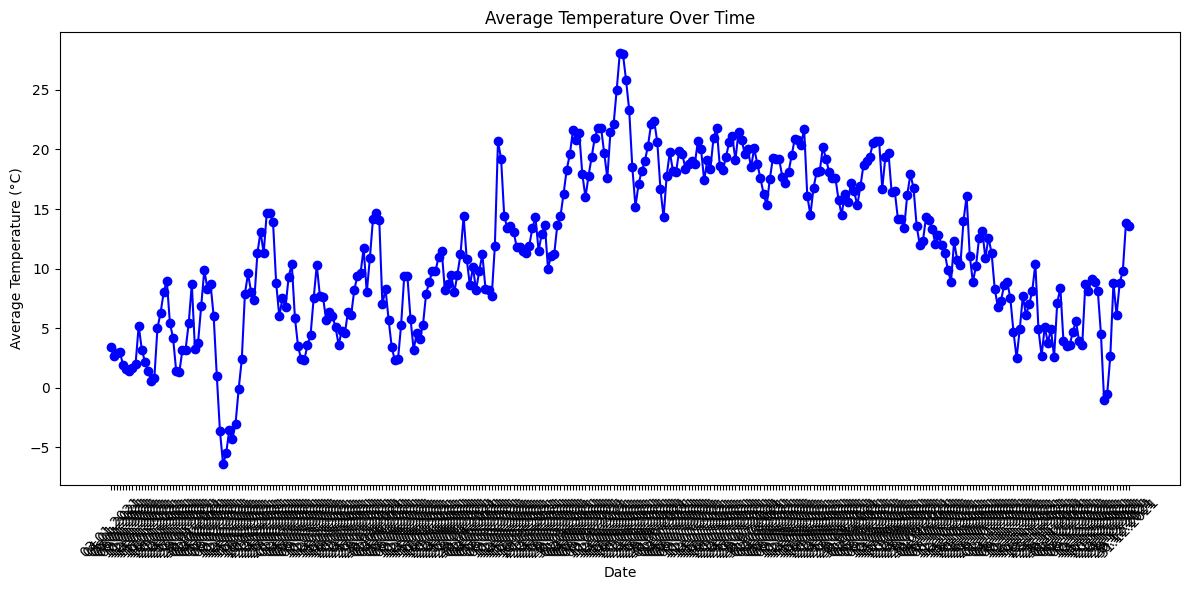

<ipython-input-11-4cb206174a5c>:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='UMONAT', data=accident_data, palette='viridis')


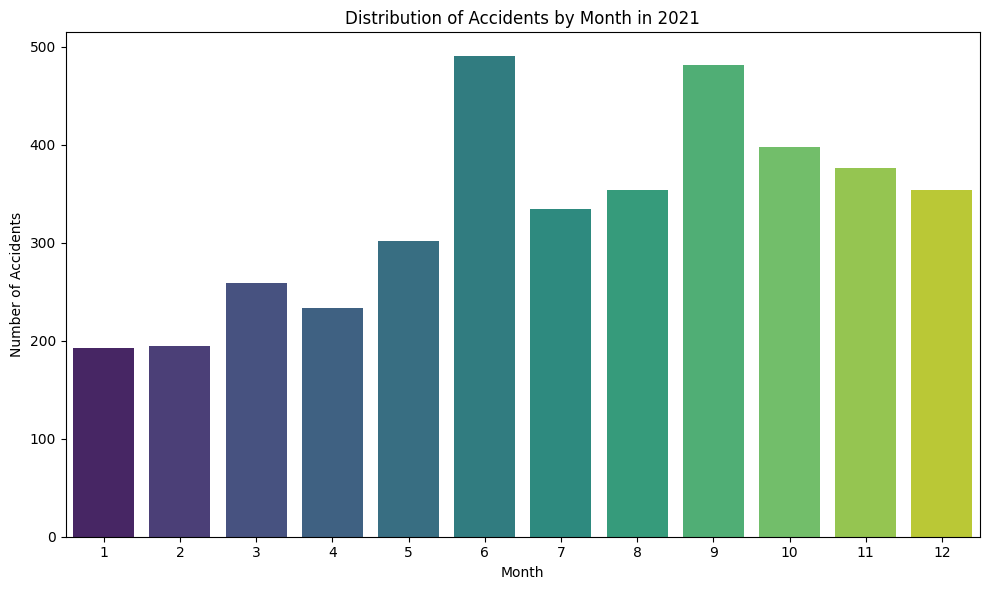

<ipython-input-11-4cb206174a5c>:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='District', data=construction_data, palette='plasma', order=construction_data['District'].value_counts().index)


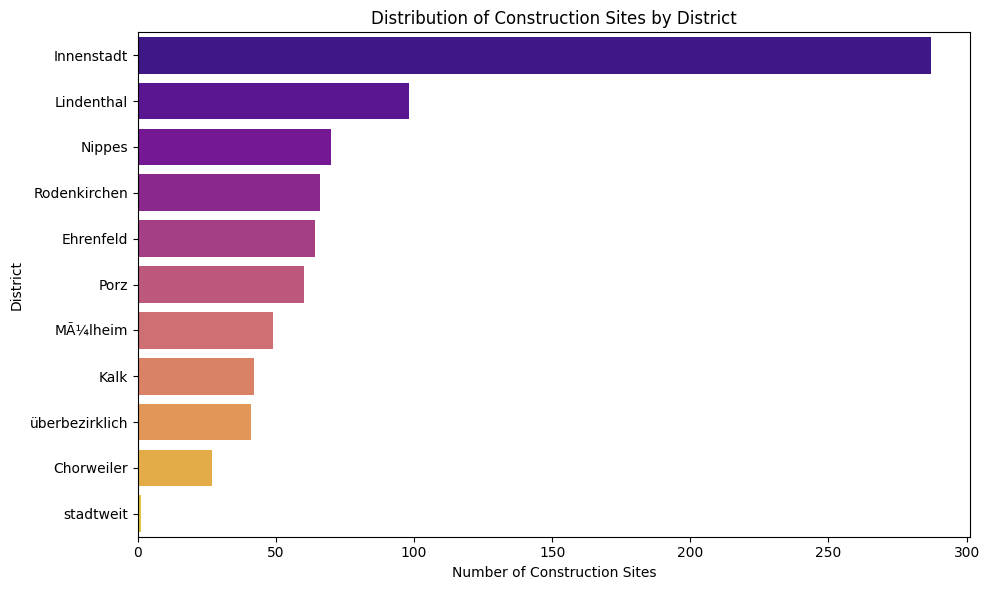

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the datasets
weather_data_path = '/mnt/TäglicheWetterdatenALLES.CSV'
accident_data_path = '/mnt/Unfallstatistik 2021 (2).csv'
construction_data_path = '/mnt/Baustellen_Koeln_2021.csv'

# Check if the file exists and provide suggestions if not found
if not os.path.exists(weather_data_path):
    # Suggest possible solutions in the error message
    raise FileNotFoundError(f"The file {weather_data_path} does not exist. "
                            f"Please check the file path and ensure the file exists. "
                            f"You might need to download or move the file to the correct location. "
                            "Also, ensure that permissions are set correctly for accessing the file.")

# Read the CSV files into pandas DataFrames
weather_data = pd.read_csv(weather_data_path, delimiter=';', encoding='latin1')
accident_data = pd.read_csv(accident_data_path, delimiter=';', encoding='latin1')
construction_data = pd.read_csv(construction_data_path, delimiter=',', encoding='latin1')

# ... (rest of the code remains the same)

# Read the CSV files into pandas DataFrames
weather_data = pd.read_csv(weather_data_path, delimiter=';', encoding='latin1')
accident_data = pd.read_csv(accident_data_path, delimiter=';', encoding='latin1')
construction_data = pd.read_csv(construction_data_path, delimiter=',', encoding='latin1')

# Cleaning Weather Data
weather_data.columns = ['Datum', 'Minimum_Temp', 'Maximum_Temp', 'Average_Temp', 'Precipitation', 'Sunshine']
numeric_columns = ['Minimum_Temp', 'Maximum_Temp', 'Average_Temp', 'Precipitation']
for column in numeric_columns:
    weather_data[column] = weather_data[column].str.replace(',', '.').str.strip()
    weather_data[column] = pd.to_numeric(weather_data[column], errors='coerce')

# Cleaning Accident Data
accident_data.columns = [
    'OBJECTID', 'UIDENTSTLAE', 'ULAND', 'UREGBEZ', 'UKREIS', 'UGEMEINDE',
    'UJAHR', 'UMONAT', 'USTUNDE', 'UWOCHENTAG', 'UKATEGORIE', 'UART', 'UTYP1',
    'ULICHTVERH', 'USTRZUSTAND', 'IstRad', 'IstPKW', 'IstFuss', 'IstKrad',
    'IstGkfz', 'IstSonstige', 'LINREFX', 'LINREFY', 'XGCSWGS84', 'YGCSWGS84'
]
for column in ['UIDENTSTLAE', 'LINREFX', 'LINREFY', 'XGCSWGS84', 'YGCSWGS84']:
    accident_data[column] = accident_data[column].str.replace(',', '.').str.strip()
    accident_data[column] = pd.to_numeric(accident_data[column], errors='coerce')

# Cleaning Construction Data
construction_data.columns = [
    'Icon_Src', 'Location', 'Details_Link', 'Timeframe_Info',
    'Start_Date', 'End_Date', 'District'
]
for column in construction_data.columns:
    construction_data[column] = construction_data[column].str.strip()
construction_data['District'] = construction_data['District'].replace({
    'Ã¼berbezirklich': 'überbezirklich',
    'Lindenthal': 'Lindenthal',
    'MÃ¤rz': 'März'
})
construction_data['Timeframe_Info'] = construction_data['Timeframe_Info'].str.replace(r'von \n\n\n bis , |am \n\n\n, ', '', regex=True).str.strip()

# Descriptive Analysis

# Weather Data Summary
weather_summary = weather_data.describe()
print("Weather Data Summary:")
print(weather_summary)

# Accident Data Summary
accident_summary = accident_data.describe()
accident_counts = accident_data.nunique()
print("\nAccident Data Summary:")
print(accident_summary)
print("\nUnique Counts in Accident Data:")
print(accident_counts)

# Construction Data Summary
construction_summary = construction_data.describe(include='all')
print("\nConstruction Data Summary:")
print(construction_summary)

# Visualizations

# Plot 1: Average Temperature Over Time
plt.figure(figsize=(12, 6))
plt.plot(weather_data['Datum'], weather_data['Average_Temp'], color='blue', linestyle='-', marker='o')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Distribution of Accidents by Month
plt.figure(figsize=(10, 6))
sns.countplot(x='UMONAT', data=accident_data, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Accidents by Month in 2021')
plt.tight_layout()
plt.show()

# Plot 3: Distribution of Construction Sites by District
plt.figure(figsize=(10, 6))
sns.countplot(y='District', data=construction_data, palette='plasma', order=construction_data['District'].value_counts().index)
plt.xlabel('Number of Construction Sites')
plt.ylabel('District')
plt.title('Distribution of Construction Sites by District')
plt.tight_layout()
plt.show()
